In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the percapita csv file and name the variable
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


## Q5

Q5- How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(7662, 4)

Answer: There are 7,662 rows and 4 columns in the gdp per capita dataset.

## Q6

Q6- Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
#Drop the columns titled "Value Footnotes"
gdp_df = gdp_df.drop("Value Footnotes", axis = 'columns')

In [7]:
#Rename the remaining columns
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})

## Q7

Q7- How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
#Counting the number of years per country
counted_years = gdp_df.groupby("Country")["Year"].count()

Answer 7B: The following are the 40 countries missing years of data. 

In [9]:
#Showing the 40 countries with years of missing data
counted_years.sort_values().head(40)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Cayman Islands               16
Nauru                        19
Afghanistan                  20
CuraÃ§ao                     22
Palau                        22
SÃ£o TomÃ© and Principe      22
Qatar                        23
Other small states           23
Timor-Leste                  23
Liberia                      23
Libya                        24
San Marino                   25
Small states                 26
Montenegro                   26
Maldives                     28
Moldova                      28
Israel                       28
Iceland                      28
Estonia                      28
Croatia                      28
Serbia                       28
Slovenia                     28
Lithuania                    28
Latvia                       28
West Bank and Gaza           29
Bosnia and Herzegovina       29


Answer 7A: There are 202 countries with all 33 years of data.

In [10]:
#Showing the 202 countries with all 33 years of data
counted_years.sort_values().tail(202)

Country
Papua New Guinea               33
Pakistan                       33
Australia                      33
Pacific island small states    33
Austria                        33
                               ..
Jamaica                        33
Japan                          33
Jordan                         33
IDA total                      33
Zimbabwe                       33
Name: Year, Length: 202, dtype: int64

Answer 7C: Looking at this data of counted years, I notice Djibouti and Somalia only have 10 years of data, the 202 countries will full data have 33 years. The countries with less than 33 years seem to be smaller countries.

## Q8

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [11]:
#Getting 2020 
year_2020 = gdp_df[gdp_df["Year"] == 2020]

In [12]:
year_2020.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764


C:\Users\adaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

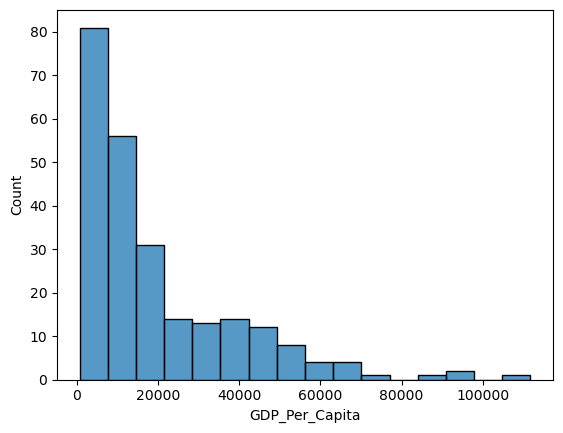

In [13]:
#Histogram
sns.histplot(data=year_2020, x="GDP_Per_Capita")

C:\Users\adaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

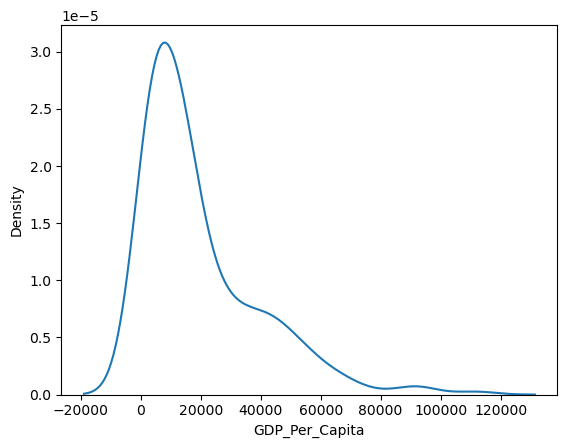

In [14]:
#Density plot
sns.kdeplot(year_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

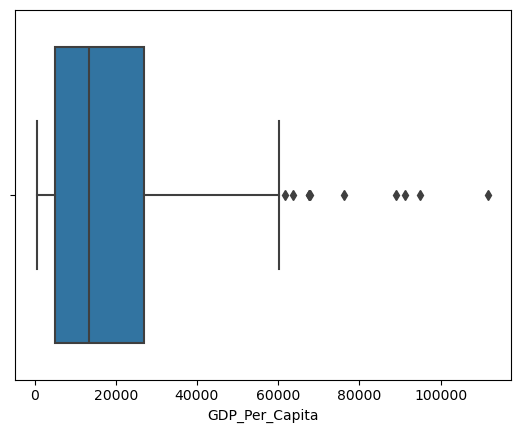

In [15]:
#Boxplot
sns.boxplot(x=year_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

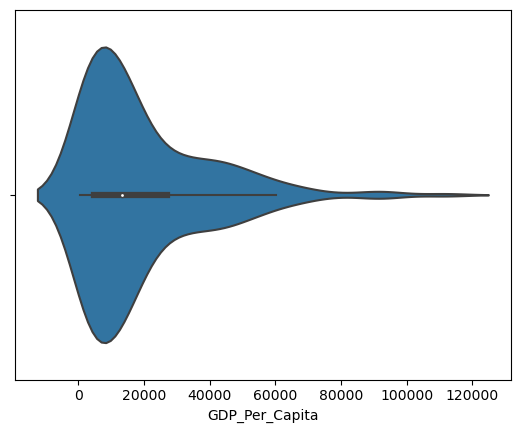

In [16]:
#Violin plot
sns.violinplot(x=year_2020["GDP_Per_Capita"])

## Q9

9. What was the median GDP per capita value in 2020?


In [17]:
year_2020["GDP_Per_Capita"].median()

13357.997573370474

Answer 9 (rounded): 13,358

## Q10

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of lot.


In [21]:
#Narrowing down the info to the years 1990, 2000, 2010, 2020 and saving it to gdp_decades
gdp_decades = gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] == 2000) | (gdp_df["Year"] == 2010) | (gdp_df["Year"] == 2020)]

In [22]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

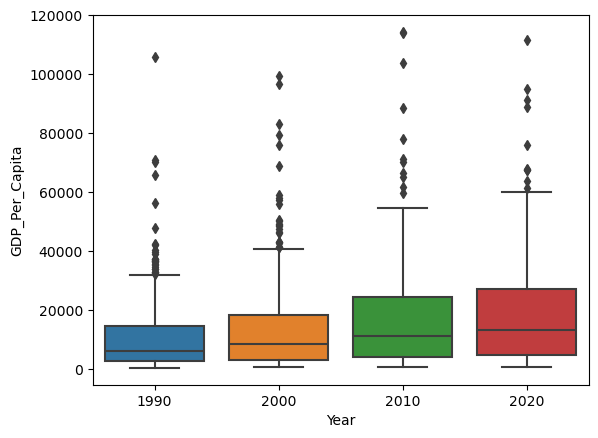

In [39]:
#Boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

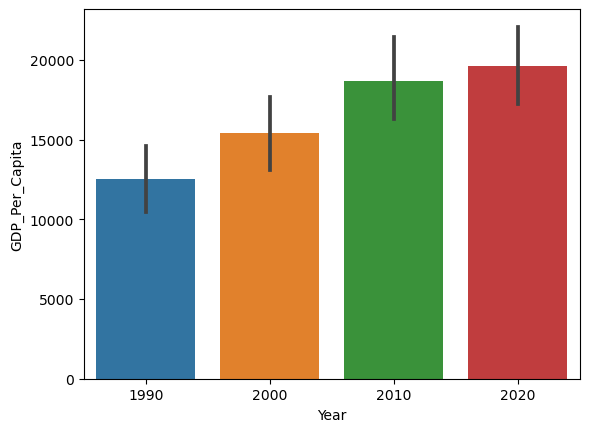

In [42]:
#Barplot
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita",
    data=gdp_decades, 
    )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

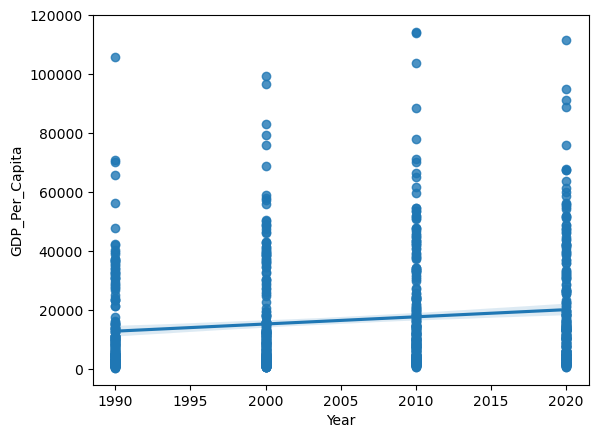

In [44]:
#Scatterplot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

In [ ]:
#Scatterplot with trend line